# Series
## Proyecto PAPIME PE101019

*   Autores: 
    - Ingrid Pamela Ruiz Puga
    - Luis M. de la Cruz Salas
*   Rev: sáb sep 12 08:30:56 CDT 2020

In [1]:
import os, sys
sys.path.insert(0, os.path.abspath('../../Utils'))

from sympy import Symbol, limit, oo
import numpy as np
import matplotlib.pyplot as plt
import gutils as vis
%matplotlib inline

Una serie matemática es la expresión de la **suma del número infinito de términos de una sucesión**.

La suma hasta un término específico cualquiera se llama suma parcial. 

Si las sumas parciales de una serie infinita se aproximan cada vez más a un numero $k$, de modo que tal que si la serie continúa, la suma puede acercarse a $k$ tanto como se desee; a esto se le conoce como el límite de las sumas parciales o el límite de la serie infinita (suma al infinito, forma abreviada para designar a su límite pues realizar la suma infinita es imposible).

### Definición de serie
Sea $a_n$ una sucesión de números reales. Para cada $n \in N$, definimos $$S_n := \sum a_n$$ como la serie $S_n$  compuesta por la suma de todos los elementos en la sucesión $a_n$.

### Convergencia de series
Diremos que una serie converge cuando una vez sumados el mayor número de elementos posibles el resultado se acerca cada vez más a un número $S$. Formalmente escribimos:

Una serie $S_n$ es convergente si $\exists S $ tal que 
$$\lim_{n \to \infty} S_n = S $$ 
Por lo tanto $S$ es el valor suma de la serie $S_n$ y se escribe de la siguiente manera

$$\sum_{n=1}^{\infty}a_n= S$$</p>

### Condición para convergencia de una serie
**Proposición:** Para que una serie $S_n$ sea convergente es necesario que la sucesión sea convergente, es decir:
$\lim_{n \to \infty} a_n = 0 $.

### Convergencia absoluta
Una serie $\sum a_n$ es absolutamente convergente si la serie  $\sum |a_n| $ es convergente.


### Ejemplo 1.
La serie $\displaystyle \sum_{n=1}^{\infty}\frac{\sin( n) }{n^2}$ es absolutamente convergente.

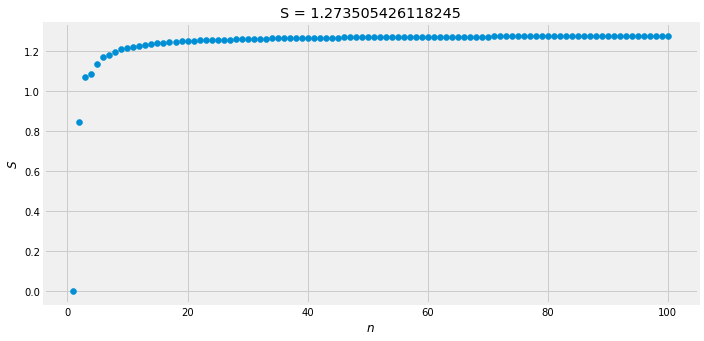

In [2]:
def s1(N):
    suma = 0
    for n in range(1,N):
        suma += np.fabs(np.sin(n) / n**2)
    return suma

inter = np.arange(1,101,1)
valor = [s1(S) for S in inter]

par = [{'title':'S = {}'.format(valor[-1]), 
        'xlabel':'$n$',
        'ylabel':'$S$'}
      ]

graf = vis.planoCartesiano(par=par)
graf.scatter(x = inter, y= valor)
graf.show()

### Convergencia condicional
Una serie  $\sum a_n$ es **condicionalmente convergente** si y sólo si la serie converge pero no absolutamente.

### Convergencia de series infinitas
Una serie infinita puede converger en su límite de tres formas:

1.   Las sumas parciales se acercan al límite pero no lo alcanzan en realidad, es decir, nunca lo sobrepasan.
2.   Las sumas parciales alcanzan el límite.
3.   Las sumas parciales sobrepasan al límite antes de converger.

### Divergencia
En este caso diremos que una serie **diverge** cuando el límite de la serie no existe o es infinito, es decir: 
$$\lim_{x \to \infty} S_n = \infty $$ 

Si una serie no tiene límite entonces toma el nombre de **oscilante**.

Al igual que algunas propiedades de las sucesiones, las series son *distributivas*, *aditivas* y *lineales*.

### Ejemplo 2. Serie geométrica.
Una **Serie geométrica** : Es aquella cuyos términos forman una progresión geométrica, es decir, cada término de la serie es igual al anterior multiplicado por una constante. La fórmula es la siguiente:

$$\sum_{k=0}^{n} a r^k= a \cdot \frac{1-r^{n+1}}{1-r}$$

Una serie geométrica mostrada **diverge** si $r$ es mayor o igual a $1$. Por otro lado, si $|r| < 1$, entonces dicha serie converge a $\displaystyle \frac{a}{1-r}$.

Por ejemplo: $\displaystyle \sum_{k=0}^{292} 3  \frac{1}{6} ^k$

La serie converge a: $\displaystyle \frac{a}{1-r}= \frac{3}{1-\frac{1}{6}}=3.6$

Veamos:

In [3]:
def seriegeometrica(inicio,final):
    suma = 0
    for k in range(inicio, final + 1):
        suma += 3*((1/6)**k)
    return suma

seriegeometrica(0,292)

3.600000000000001

### Ejemplo 3. Serie Telescópica.

Una **Serie telescópica** es aquella tal que cada término se expresa como una diferencia de la forma $a_n = b_n - b_{n+1}$ y se expresa como sigue:

$$\sum_{n=0}^{N} b_n - b_{n+1}= b_0 - b_{N+1}$$

Por ejemplo: $\displaystyle \sum_{k=1}^{8} \left( \frac{1}{k}-\frac{1}{k+1}\right)$

Al realizar las sumas parciales de la serie anterior es posible observar que el resultado de las sumas parciales anteriores es igual a $\frac{1}{1} - \frac{1}{9}$ = 0.888....

In [4]:
def serietelescopica(inicio,final):
    control = 0
    for x in range(inicio, final+1):
        control += (1/x)-(1/(x+1))
    return control

serietelescopica(1,8)


0.8888888888888888

Dado que la serie del ejemplo 3 es una serie telescópica, usando la fórmula obtenemos que 

$$\sum_{k=1}^{N} \left( \frac{1}{k}-\frac{1}{k+1}\right) = 1 - \frac{1}{N+1},$$

y más aún, convergería a $1$ para $N$ muy grande. Esto último se puede comprobar calculando el límite cuando $N$ tiende a $\infty$ de la última expresión.

 Primero observaremos la gráfica de la serie para posteriormente calcular el límite.

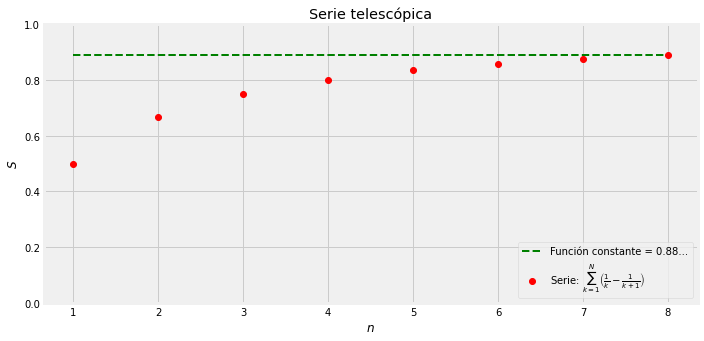

In [5]:
def serietelescopicacompleta(inicio,final):
    lista = []
    r = 0
    for x in range(inicio, final+1):
        r += (1/x)-(1/(x+1))
        lista.append(r)
    return lista

x4 = np.arange(1, 9, 1) 
y4 = serietelescopicacompleta(1,8)
par = [{'title':'Serie telescópica', 
        'xlabel':'$n$',
        'ylabel':'$S$',
       'ylim':(0,1)}
      ]

graf = vis.planoCartesiano(par=par)
graf.plot(x=[1,8],y=[serietelescopica(1,8),serietelescopica(1,8)], 
          par={'c':'green','linestyle':'--','lw':2,'label':r'Función constante = 0.88...'})
graf.scatter(x=x4, y=y4,
             par={'label':r'Serie: $\sum_{k=1}^{N} \left( \frac{1}{k}-\frac{1}{k+1}\right)$','lw':1,'color':'red', 'zorder':5})
graf.legend(par={'loc':'lower right'})
graf.show()

En este ejemplo se tiene :
$$\sum_{n=1}^{N} \frac{1}{n} - \frac{1}{n+1}=  1 - \frac{1}{N+1}$$

Si calculamos el límite cuando $N$ tiende a $\infty$ obtenemos que:

$$\displaystyle \lim_{N \to \infty} \sum_{n=1}^{N} \frac{1}{n} - \frac{1}{n+1}= \lim_{N \to \infty}  1 - \frac{1}{N+1} = 1$$

Esto se puede verificar como sigue:

In [6]:
x = Symbol('x') 
y=1-(1/(x+1)) 
limit(y, x, oo)

1

### Serie de términos positivos.
Es aquella donde cada $a_n  \geqslant 0$ $\forall n$  por lo que es una serie siempre creciente.

En muchas ocasiones resulta difícil determinar la suma de una serie, por esa razón nos conformamos con saber su carácter, es decir si converge o no.

### Criterio de la integral 
**Proposición:** Sea $\sum_{n=1}^{\infty}a_n $ una serie de términos positivos y $f(n)=a_n$ para $n \geqslant 1 $ una función decreciente entonces:



* Si  $\int_{1}^{ \infty} f(x) \cdot dx$ converge, entonces $\sum_{n=1}^{\infty}a_n $ converge.
* Si  $\int_{1}^{ \infty} f(x) \cdot dx$ diverge, entonces $\sum_{n=1}^{\infty}a_n $ diverge.

### Teorema Serie P
Se dice que  $\displaystyle \sum_{n=1}^{a}a_n $ es una **serie P** si tiene la forma $\displaystyle \sum_{n=1}^{a} \frac{1}{n^p} $ donde $p \in {\mathbb{R}}$

**Proposición:** La serie P converge si 
$ p> 1$ y diverge si $p \leq 1$.

### Ejemplo 4. 
La serie armónica $\sum_{n=1}^{\infty} \frac{1}{n} $ diverge.

Primero observemos graficamente la sucesión:

/home/luiggi/GitSites/Prometeo/Utils/gutils.py:182: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  return self.__ax[n-1].annotate(**par)


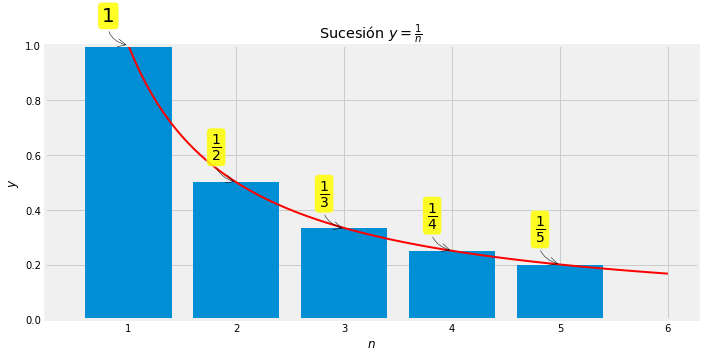

In [14]:
f = lambda t: 1/t

t = np.linspace(0.5, 6, num=100)
t1 = np.array([1, 2, 3, 4, 5 ])

y2 = f(t)
y3= f(t1)

par = [{'title':r'Sucesión $y=\frac{1}{n}$', 
        'xlabel':'$n$',
        'ylabel':'$y$',
       'ylim':(0,1)}
      ]

graf = vis.planoCartesiano(par=par)
graf.plot(x=t, y=y2, par={'c':'red','linestyle':'-', 'lw':2,'label':'Función constante 0'})
graf.bar(x=t1, y=y3)
graf.annotate(par={'s':'1', 'xy':(1, 1), 'xytext':(-20,20), 'fontsize':20,
            'textcoords':'offset points', 'ha':'center', 'va':'bottom',
            'bbox':{'boxstyle':'round','pad':0.2, 'fc':'yellow', 'alpha':0.85},
            'arrowprops':{'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 
                           'color':'black'}})
graf.annotate(par={'s':r'$\frac{1}{2}$', 'xy':(2, 0.5), 'xytext':(-20,20), 'fontsize':20,
            'textcoords':'offset points', 'ha':'center', 'va':'bottom',
            'bbox':{'boxstyle':'round','pad':0.2, 'fc':'yellow', 'alpha':0.85},
            'arrowprops':{'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 
                           'color':'black'}})
graf.annotate(par={'s':r'$\frac{1}{3}$', 'xy':(3, 0.33), 'xytext':(-20,20), 'fontsize':20,
            'textcoords':'offset points', 'ha':'center', 'va':'bottom',
            'bbox':{'boxstyle':'round','pad':0.2, 'fc':'yellow', 'alpha':0.85},
            'arrowprops':{'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 
                           'color':'black'}})
graf.annotate(par={'s':r'$\frac{1}{4}$', 'xy':(4, 0.25), 'xytext':(-20,20), 'fontsize':20,
            'textcoords':'offset points', 'ha':'center', 'va':'bottom',
            'bbox':{'boxstyle':'round','pad':0.2, 'fc':'yellow', 'alpha':0.85},
            'arrowprops':{'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 
                           'color':'black'}})
graf.annotate(par={'s':r'$\frac{1}{5}$', 'xy':(5, 0.2), 'xytext':(-20,20), 'fontsize':20,
            'textcoords':'offset points', 'ha':'center', 'va':'bottom',
            'bbox':{'boxstyle':'round','pad':0.2, 'fc':'yellow', 'alpha':0.85},
            'arrowprops':{'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 
                           'color':'black'}})
graf.show()

La gráfica de la serie con las sumas parciales es la que sigue:

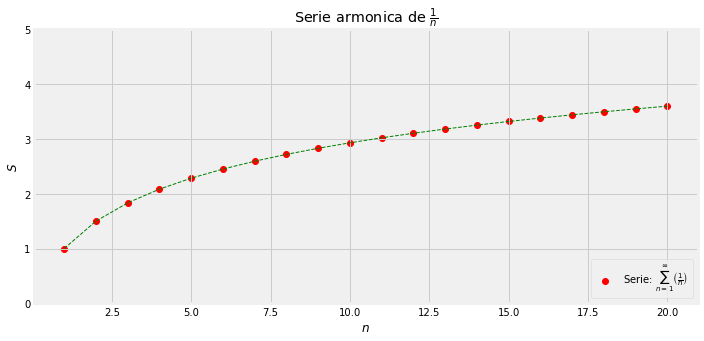

In [12]:
def f(inicio, final):
    lista = []
    r = 0
    for x in range(inicio, final+1):
        r += (1/x)
        lista.append(r)
    return lista

x4 = np.arange(1, 21, 1) 
y4=f(1,20)
par = [{'title':r'Serie armonica de $\frac{1}{n}$', 
        'xlabel':'$n$',
        'ylabel':'$S$',
       'ylim':(0,5)}
      ]
y4
graf = vis.planoCartesiano(par=par)
graf.plot(x=x4,y=y4, par={'c':'green','linestyle':'--','lw':1})
graf.scatter(x=x4, y=y4,par={'label':r'Serie: $\sum_{n=1}^{\infty} \left( \frac{1}{n}\right)$','lw':1,'color':'red', 'zorder':0})
graf.legend(par={'loc':'lower right'})
graf.show()

Es importante notar que aunque la serie crece a distintas velocidades no converge en algún punto. Puede ser sencillo verificar esto utilizando algunos pasos algebraicos donde será claro que se sumará una constante infinitamente a la serie. Intente probar esto.



###  Criterio de la razón

Sea  $\sum_{n=1}^{\infty}a_n $  una serie de términos positivos y sea 
$\displaystyle r= \lim_{n \to \infty} \frac{a_{n+1}}{a_n}$, entonces:

*   Si $r<1$ entonces $\sum_{n=1}^{\infty}a_n $  converge
*   Si $r>1$ entonces $\sum_{n=1}^{\infty}a_n $ diverge

### Ejemplo 5.
Determinar si la siguiente serie converge o diverge. 

$$\sum_{n=1}^{\infty} \frac{k^k}{k!} $$ 

Calculemos $r$:

$$
\begin{eqnarray}
r = \lim_{k \to \infty} \frac{a_{n+1}}{a_n}
  & = & \lim_{k \to \infty} \frac{(k+1)^{k+1} / (k+1)!}{k^k / k!} \\
 r & = & \lim_{k \to \infty} \frac{{k!(k+1)^{k}}{(k+1)}}{{k^k}(k+1){k!}} \\
 r & = & \lim_{k \to \infty} \left( 1+ \frac{1}{k}\right) ^k
\end{eqnarray}
$$

¿Puede calcular este límite? 

In [17]:
k = Symbol('x') 
y=(1+(1/k))**k 
limit(y, k, oo)

E

Entonces $r = e >1$ por lo que según el criterio de la razón la serie $a_n$ diverge.

### Serie alternada.
Se dice que una serie es **alternada** cuando sus términos son alternativamente positivos y negativos, por ejemplo $s_n$ es alternada si:

$$\sum_{n=1}^{\infty}(-1)^{n+1}s_n= s_1-s_2+s_3-s_4+...$$

### Criterio de Leibniz
**Proposición:** Una serie alternada $\displaystyle \sum_{n=1}^{\infty}(-1)^{n+1}s_n$ tal que $s_n>0$ es convergente si cumple las siguientes condiciones:
*   $\displaystyle s_n 	\geq s_{n+1} \forall  n $ es decir, si $s_n$ es decreciente.
*   $\displaystyle \lim_{k \to +\infty} s_n = 0$

### Ejemplo 6.
Determinar si la serie  $\displaystyle \sum \frac{(-1)^n}{\sqrt{n} }$ es convergente.

Se obsreva que la serie es alternada, veámoslo gráficamente:

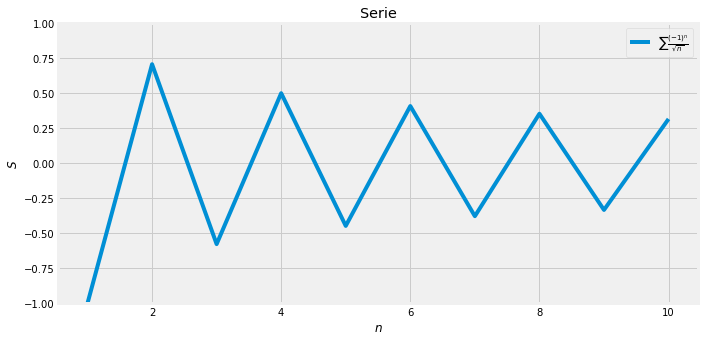

In [24]:
f = lambda t: ((-1)**t)/(np.sqrt(t))

t = np.linspace(1, 10, num=10)
y2 = f(t)

par = [{'title':'Serie', 
        'xlabel':'$n$',
        'ylabel':'$S$',
       'ylim':(-1,1)}
      ]

graf = vis.planoCartesiano(par=par)
graf.plot(x=t, y=y2,par={'label':r'$\sum \frac{(-1)^n}{\sqrt{n} }$'})
graf.legend()
graf.show()

De la gráfica observamos que la serie es decreciente. Ahora calculemos el límite:

In [26]:
x = Symbol('x') 
y=abs((-1)**x)/(x**(1/2)) 
limit(y, x, oo)

0

- Por el criterio de Leibniz esta serie es convergente. 
- Pero según el criterio de convergencia absoluta tenemos:
$$
\sum \left|\frac{(-1)^n}{\sqrt{n}}\right| = \sum\frac{1}{\sqrt{n}}
$$

observamos que bajo este criterio la serie es divergente pues utilizando el teorema de la serie P, vemos que
$p=\frac{1}{2} \leq 1$.

De lo anterior se concluye que la serie es condicionalmente convergente.

### Ejemplo 7.
En un experimento una lámpara que se apaga al cabo de un minuto, luego se prende al cabo de medio minuto, se apaga después de un cuarto de minuto y así sucesivamente en una serie infinita de encendido y apagado. ¿En qué momento convergerá esta serie?

La forma que la serie toma es la siguiente:
$$1+ \frac{1}{2}+  \frac{1}{4} + \frac{1}{8} + ...$$
Por lo que la serie se ve de la siguiente manera:
$$\sum_{n=0}^{\infty} \frac{1}{2^n}$$

Podemos calcular el límite:

In [28]:
n = Symbol('x') 
y = (1/(2**(n)))
limit(y, n, oo)

0

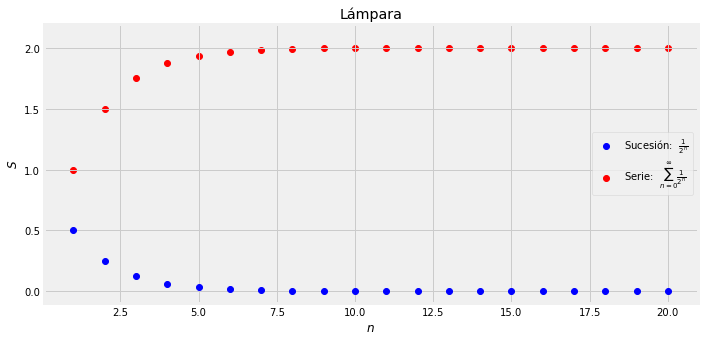

In [33]:
f = lambda t: 1/(2**(t))

def st(inicio, final):
    lista = []
    r = 0
    for n in range(inicio, final+1):
        r += 1/(2**(n))
        lista.append(r)
    return lista

t = np.arange(1, 21, 1) 
y = f(t)
y2 = st(0,19)

par = [{'title':r'Lámpara', 
        'xlabel':'$n$',
        'ylabel':'$S$',
       'ylim':(-0.1,2.2)}
      ]

graf = vis.planoCartesiano(par=par)
graf.scatter(x=t, y=y,par={'ls':'-','lw':1,'color':'blue', 'zorder':3,'label':r'Sucesión:  $\frac{1}{2^n}$'})
graf.scatter(x=t, y=y2, par={'label':r'Serie:  $\sum_{n=0}^{\infty} \frac{1}{2^n}$','lw':1,'color':'red', 'zorder':0})
graf.legend()
graf.show()



Al realizar la suma de la serie, la lámpara converge en el minuto 2 (puntos rojos).
Observamos también que la sucesión es decreciente (puntos azules).

Pero la pregunta final será si la lámpara estará prendida o apagada al terminar los dos minutos. La pregunta es interesante pero no es fácil de responder en lo abstracto, pues responder dicha pregunta es análogamente a responder si el último número de $\pi$ es par o impar. 

## Referencias

 
*   Banach, S., Cálculo Diferencial e Integral. México: UTEHA, 1991.

*   Thompson, Silvanus Phillips, 1851-1916, autor.México : McGraw-Hill Interamericana, 2012.

*   Courant, R., John, F., Introducción al Cálculo y al Análisis. México: Editorial Limusa, 1996.

* Spivak, M., Cálculo Infinitesimal ($2^{a}$ ed.). México: Reverté, 1998.

* Briseño, L., Palmas, Ó., Verdugo, J.,  Una mirada al cálculo a través de las sucesiones ($2^{a}$ ed.). México: Prensas de Ciencias, 2015.



